# Logistic Regression Classification

In [34]:
#import required libs
import pandas as pd
import numpy as np

#import required libraries for plotting the graphs for visualization
import seaborn as sn
import matplotlib.pyplot as plt 

#instruction to show the output directly below the code cell that produced it.
%matplotlib inline

#ignore warnings for deprecations to get clean output
import warnings
warnings.filterwarnings('ignore')

#library to split the data into test & train
from sklearn.model_selection import train_test_split

#library to normalize the data using Z score 
from sklearn.preprocessing import StandardScaler

In [35]:
df1=pd.read_csv('liver_disease_1.csv')

In [36]:
df1.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [37]:
df1.tail()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,No


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [39]:
df1.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


# Find the missing valus in the dataset

In [40]:
#Check the 0 values
print ("Total records in given dataset     : {0}".format(len(df1)))
print ("Missing Age count                  : {0}".format(len(df1.loc[df1.Age == 0])))
print ("Missing Total_Bilirubin            : {0}".format(len(df1.loc[df1.Total_Bilirubin == 0])))
print ("Missing Direct_Bilirubin           : {0}".format(len(df1.loc[df1.Direct_Bilirubin == 0]))) 
print ("Missing Alkaline_Phosphotase       : {0}".format(len(df1.loc[df1.Alkaline_Phosphotase == 0])))
print ("Missing Alamine_Aminotransferase   : {0}".format(len(df1.loc[df1.Alamine_Aminotransferase == 0])))
print ("Missing Aspartate_Aminotransferase : {0}".format(len(df1.loc[df1.Aspartate_Aminotransferase == 0])))
print ("Missing Total_Protiens             : {0}".format(len(df1.loc[df1.Total_Protiens == 0])))
print ("Missing Albumin                    : {0}".format(len(df1.loc[df1.Albumin == 0])))
print ("Missing Albumin_and_Globulin_Ratio : {0}".format(len(df1.loc[df1.Albumin_and_Globulin_Ratio == 0])))
print ("Missing Output Value               : {0}".format(len(df1.loc[df1.Dataset == 0])))

Total records in given dataset     : 583
Missing Age count                  : 0
Missing Total_Bilirubin            : 0
Missing Direct_Bilirubin           : 0
Missing Alkaline_Phosphotase       : 0
Missing Alamine_Aminotransferase   : 0
Missing Aspartate_Aminotransferase : 0
Missing Total_Protiens             : 0
Missing Albumin                    : 0
Missing Albumin_and_Globulin_Ratio : 0
Missing Output Value               : 0


In [41]:
#Another way to find the records having null values 
print ("Total Null records count for Albumin_and_Globulin_Ratio   : {0}".format(len(df1.loc[df1.Albumin_and_Globulin_Ratio.isnull()])))

Total Null records count for Albumin_and_Globulin_Ratio   : 4


In [42]:
#Albumin_and_Globulin_Ratio looks as a normal distribution so we will fill the null values with Mean
df1['Albumin_and_Globulin_Ratio'].fillna(df1['Albumin_and_Globulin_Ratio'].mean(),inplace = True)

In [43]:
#Lets recheck the presence of null values
df1.isnull().values.any()

False

In [44]:
df1.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [45]:
#df1.drop_duplicates(subset=None, keep='first', inplace=True)
#Removing duplicates actually reduced the model accuracy in Logistic Regression Model 
#Hence keeping the 13 additional rows for the benefit for accuracy 

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [47]:
#Remove categorical values to numerical value for target feature
#Replace yes as 1 and No as 0
df1.loc[df1.Dataset == 'Yes','Dataset'] = 1
df1.loc[df1.Dataset == 'No', 'Dataset'] = 0

In [48]:
#Lets do the scaling of the given dataset & Spli the features & Labels
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df1.drop(["Dataset"],axis = 1)),
                 columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                          'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                          'Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio'])
y = df1.Dataset

In [49]:
#Split the data into Test and Train by 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42,stratify=y)

In [50]:
#import libraries for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold

c_values = list(np.arange(1,100))
param_grid = [
    {
        'C' : c_values,
        'penalty':['l1'],
        'solver':['liblinear'],
        'multi_class':['ovr'],
        'random_state':[42]
    },
    {
        'C' : c_values,
        'penalty':['l2'],
        'solver':['liblinear','newton-cg','lbfgs'],
        'multi_class':['ovr'],
        'random_state':[42]
    
    }
    
]
grid = GridSearchCV(
        LogisticRegression(class_weight='balanced'),
        param_grid,
        cv=10,
        scoring='f1'
)
grid.fit(X,y)



GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                27, 28, 29, 30, ...],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'random_state': [42], 'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                27, 28, 29, 30, ...],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'random_state': [42],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='f1')

In [52]:
print(grid.best_params_)
print ('Best score : {:.2f}'.format(grid.best_score_ * 100))

{'C': 5, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best score : 67.96


In [53]:
log_reg = LogisticRegression(C=6,
                            multi_class='ovr',
                            penalty='l2',
                            solver='liblinear',
                            random_state=42
                            )

In [54]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=6, multi_class='ovr', random_state=42, solver='liblinear')

In [55]:
y_pred = log_reg.predict(X_test)
#log_reg_predict_proba = log_reg.predict_proba(X_test)[:,1]

#y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 12  38]
 [  6 119]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        50
           1       0.76      0.95      0.84       125

    accuracy                           0.75       175
   macro avg       0.71      0.60      0.60       175
weighted avg       0.73      0.75      0.70       175



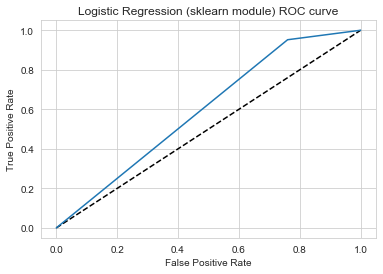

In [58]:
#Import libraries for ROC Curve
from sklearn.metrics import roc_curve

LGR_y_test = y_test 
LGR_y_pred = y_pred
#Draw the ROC curve between test data and predcited target data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression sklearn module')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (sklearn module) ROC curve')
plt.show()

# Another way to write Logistic Regression without in-built Library Function

In [59]:
#Initializing Coefficients and intercepts for number of features
def weightInitialization(n_features):
    #All coefficients initilzed as 0
    w = np.zeros((1,n_features))
    
    #Intercept as 0
    b = 0
    return w,b


#Sigmoid function as 1/1+e^-z, z is the input parameter for this function
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

#Performn Gradient decent calaculation for logistc regression cost function 
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Calling Prediction sigmoid function for w.X(Transpose) + intercept 
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    #Getting Y transpose fot the cost function
    Y_T = Y.T
    
    #Getting Logistic Regression Cost function as combined equation 
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    #Get the coefficients 
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    
    #Get the intercepts 
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    #Return Coefficientts, intercepts and cost
    return grads, cost



#Logistis regression model based on mathematical calculations 
#Input Parameters
#w: Model Coefficients 
#b: Intercepts
#X: Training Data
#Y: Training Target Feature
#learning_rate : Rate by which is the model should be learning  
#no_interations : Iterations after which algorithm should comeout 
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    #Initialize cost as null list
    costs = []
    #Start training the model for number of iterations 
    for i in range(no_iterations):
        #Get the coeffients and cost from Logstic Regression function implementing cost using sigmoid function implementatio
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update with new values 
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        #Record the cost with every 100 iterations
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    #Return the Model Coefficients , gradient and cost
    return coeff, gradient, costs
    
#Predict function with threshold as 0.5, anything above 0.5 is postive (1) else 0
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            #Assign it as 1 if the predicted value is > 0.5
            y_pred[0][i] = 1
    return y_pred

In [60]:
#Get number of features
from sklearn.metrics import accuracy_score

#Assigning Training and Test data into variables
X_tr_arr = X_train
X_ts_arr = X_test

#Get the target feature as matrix
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

#Total number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)

#Initialize the Coeffients and intercepts
w, b = weightInitialization(n_features)

#Gradient Descent implementation with cost function using sigmoid 
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]

#Print the final Coefficients 
print('Optimized weights', w)

#Print the final intercept
print('Optimized intercept',b)


#Check the accuracy of model parameters for training and test dataset
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

#Get the training dataset count 
m_tr =  X_tr_arr.shape[0]

#Get the test dataset count
m_ts =  X_ts_arr.shape[0]

#Get the prediction as 0 or 1 based on the final predicted value for training data
# >0.5 =1 , <= 0.5 = 0
y_tr_pred = predict(final_train_pred, m_tr)

#Check the Accuracy by comparing Predicted Value with Training Data
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

#Get the prediction as 0 or 1 based on the final predicted value for test data
# >0.5 =1 , <= 0.5 = 0
y_ts_pred = predict(final_test_pred, m_ts)

#Check the Accuracy by comparing Predicted Value with Test Data
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 9
Optimized weights [[ 0.03110335  0.02364321  0.02901019  0.03736353  0.03501273  0.02337927
  -0.00195265 -0.01822274 -0.02432802]]
Optimized intercept 0.09091377535461713
Training Accuracy 0.696078431372549
Test Accuracy 0.7085714285714285


# Plot the Cost reduced over iterations per hundred

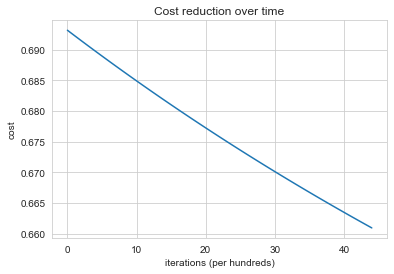

In [61]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

# Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_ts_pred.T, y_ts_arr)
print(confusion_matrix)

[[ 17  18]
 [ 33 107]]


# Precision, Recall & F1-Score for model calculated without inbuilt library fuction

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_pred.T, y_ts_arr))

              precision    recall  f1-score   support

         0.0       0.34      0.49      0.40        35
         1.0       0.86      0.76      0.81       140

    accuracy                           0.71       175
   macro avg       0.60      0.62      0.60       175
weighted avg       0.75      0.71      0.73       175



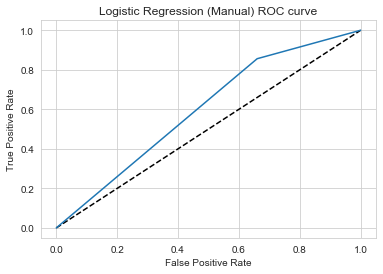

In [64]:
#Import libraries for ROC Curve
from sklearn.metrics import roc_curve


#Draw the ROC curve between test data and predcited target data
fpr, tpr, thresholds = roc_curve(y_ts_arr, y_ts_pred.T)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression (Manual)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (Manual) ROC curve')
plt.show()

# Compare the results and accuracies for both the algorithms and share your inferences.

NameError: name 'NB_y_test' is not defined

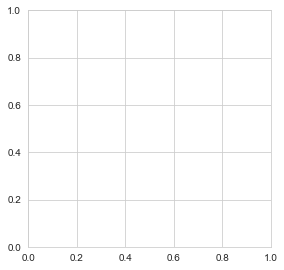

In [65]:
#Draw the ROC curve between test data and predcited target data for both the algorithms 

plt.figure(figsize=[20,20])

plt.subplot(4,4,1)
fpr, tpr, thresholds = roc_curve(NB_y_test, NB_y_pred ) #Naive Bayes using Sklearn
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes sklearn module')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC curve')

plt.subplot(4,4,2)
fpr, tpr, thresholds = roc_curve(LGR_y_test, LGR_y_pred ) #Logistic Regression using Sklearn
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression (Manual)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')


plt.show()



In [ ]:
#Area under ROC curve
#Import auc score module
from sklearn.metrics import roc_auc_score

#Calculate AUC score 
NB_AUC = roc_auc_score(NB_y_test, NB_y_pred)
LGR_AUC= roc_auc_score(LGR_y_test, LGR_y_pred)
print (" AUC Score for Naive Bayes         : {:,.3f}".format(NB_AUC))
print (" AUC Score for Logistic Regression : {:,.3f}".format(LGR_AUC))

Inference : 
    Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.In general, the ROC is used for many different levels of thresholds and thus it has many F score values. F1 score is applicable for any particular point on the ROC curve.

We can think of it as a measure of precision and recall at a particular threshold value whereas AUC is the area under the ROC curve. For F score to be high, both precision and recall should be high.

When we have a data imbalance between positive and negative samples, we should always use F1-score because of ROC averages over all possible thresholds.

In [ ]:
#Lets recheck the data imbalance part 

#Read again given dataset
df=pd.read_csv('liver_disease_1.csv')


#Find the number of records having Outcome as Yes
Liver_Disease_susceptible = len(df.loc[df.Dataset == 'Yes'])

#Find the number of records having Outcome as No
Liver_Disease_not_susceptible = len(df.loc[df.Dataset == 'No'])

#Print both the counts
print("Number of records susceptible to Liver Disease      :" , Liver_Disease_susceptible)
print("Number of records not susceptible to Liver Disease  :" , Liver_Disease_not_susceptible)


In [ ]:
#Visualize the same distribution of output class
sn.set_style('whitegrid')
sn.countplot(x='Dataset',data=df,palette='RdBu_r')

Inference:
    Logistic Regression having high F1 score is a better model for the given problem statement. 